In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from keras import layers, models
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
def load_data(data_dir):
    X = []
    y = []
    label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Resize images to (48, 48)
            image = cv2.resize(image, (48, 48))
            X.append(image)
            y.append(label_map[label])

    return np.array(X), np.array(y)


In [5]:
train_dir = "train_new"
test_dir = "validation_new"


Plotting the Dataset

In [7]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

### ANGRY

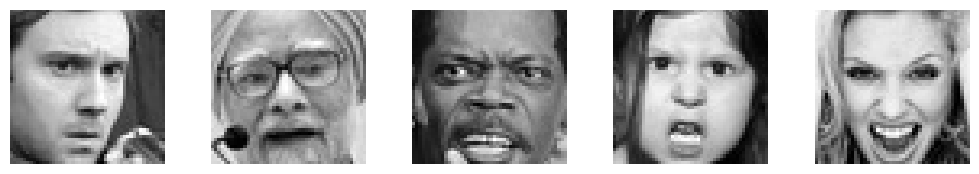

In [8]:
plot_images(train_dir+"/angry")

### DISGUST

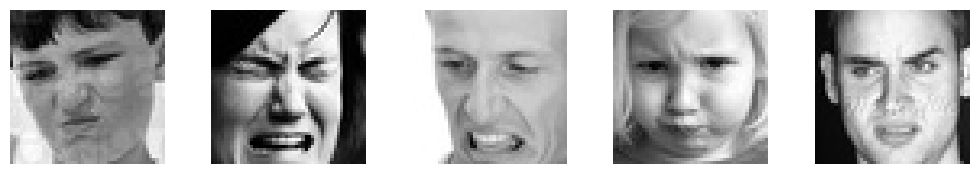

In [9]:
plot_images(train_dir+'/disgust')

### SAD

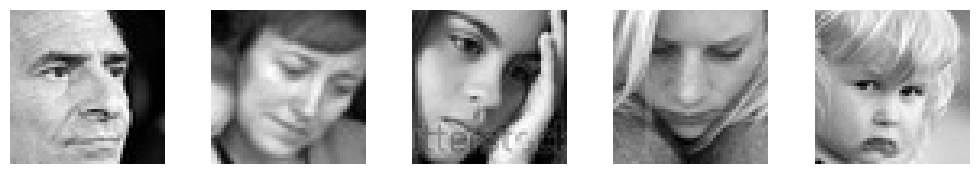

In [10]:
plot_images(train_dir+'/sad')

### HAPPY

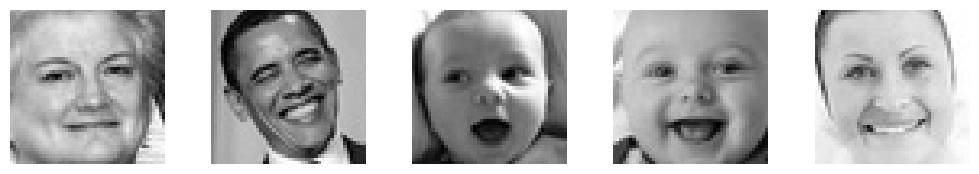

In [11]:
plot_images(train_dir+'/happy')

### FEAR

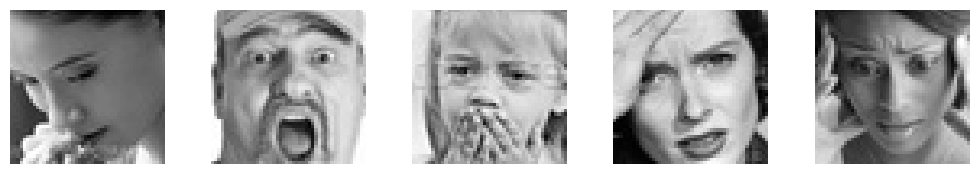

In [12]:
plot_images(train_dir+'/fear')

### NEUTRAL

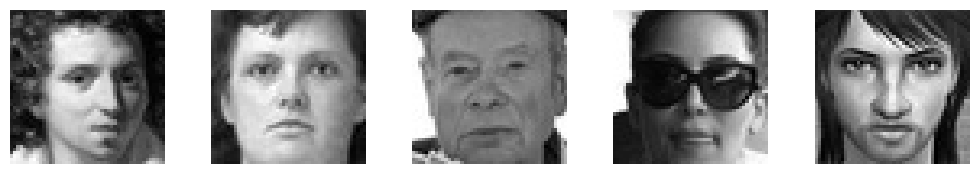

In [13]:
plot_images(train_dir+'/neutral')

### SURPRISE

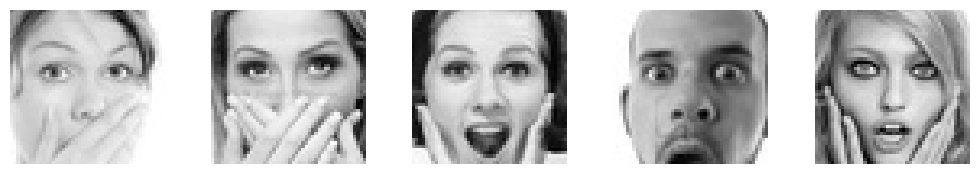

In [14]:
plot_images(train_dir+'/surprise')

### Number of images in each class

In [15]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

### For Train Dataset

{'angry': 3993, 'disgust': 436, 'fear': 4103, 'happy': 7164, 'neutral': 4982, 'sad': 4938, 'surprise': 3205}


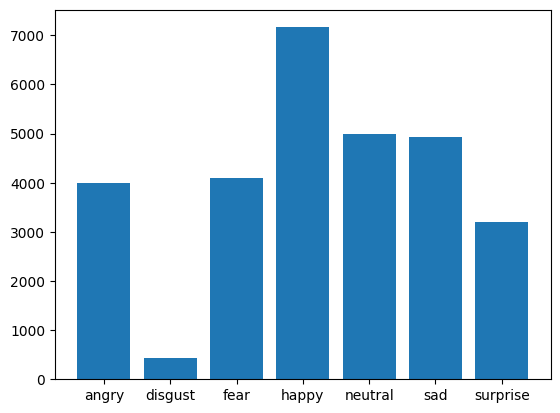

In [16]:
plot_bar_chart_diagram(train_dir)

### For Validation Dataset

{'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}


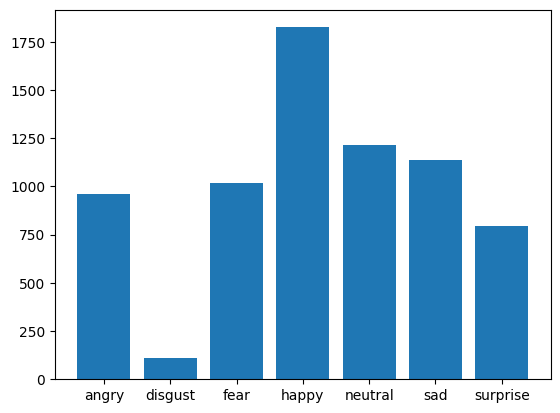

In [17]:
plot_bar_chart_diagram(test_dir)

### Loading the Dataset

In [18]:
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

### Normalize pixel values

In [19]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### Reshape data to match the input shape expected by the model

In [20]:
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

### Split the dataset into training and validation sets

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Defining the CNN Model

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Adding dropout regularization
    layers.Dense(7, activation='softmax')  # 7 output classes for 7 emotions
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling the Model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model 

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                    validation_data=(X_val, y_val) )

Epoch 1/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 49s 101ms/step - accuracy: 0.2347 - loss: 1.8357 - val_accuracy: 0.3452 - val_loss: 1.6673
Epoch 2/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.3390 - loss: 1.6605 - val_accuracy: 0.4243 - val_loss: 1.4803
Epoch 3/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - accuracy: 0.4243 - loss: 1.5037 - val_accuracy: 0.4666 - val_loss: 1.3954
Epoch 4/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 34s 94ms/step - accuracy: 0.4598 - loss: 1.4150 - val_accuracy: 0.4911 - val_loss: 1.3405
Epoch 5/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 34s 93ms/step - accuracy: 0.4811 - loss: 1.3575 - val_accuracy: 0.5022 - val_loss: 1.3216
Epoch 6/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.5005 - loss: 1.3036 - val_accuracy: 0.5164 - val_loss: 1.2664
Epoch 7/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - accuracy: 0.5212 - loss: 1.2565 - val_accuracy: 0.5329 - val_loss: 1.2273
Epoch 8/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.5440 - loss: 1.2014 -

### Evaluating and saving the Model

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
best_model = keras.models.load_model('best_model.keras')

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5247 - loss: 1.3450
Test Loss: 1.2838680744171143
Test Accuracy: 0.5512312650680542


In [26]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,067,543 (4.07 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 711,696 (2.71 MB)

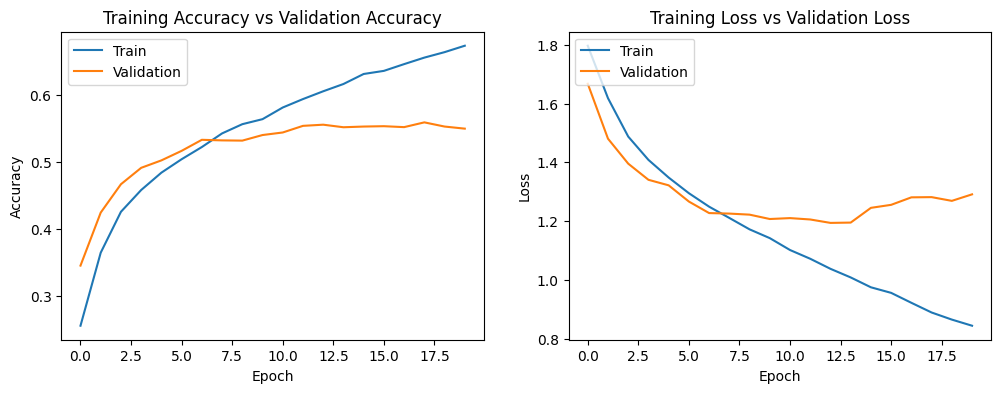

In [27]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Loading the Model for execution

In [29]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_model = load_model('best_model.keras')

In [30]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

### Function to detect emotion

In [31]:
def detect_emotion(face_image):
    # Resize image to fit the input size of the model
    face_image = cv2.resize(face_image, (48, 48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    face_image = np.expand_dims(face_image, axis=-1)  # Add channel dimension
    face_image = np.expand_dims(face_image, axis=0)  # Add batch dimension

    # Predict emotion using the model
    emotion_preds = emotion_model.predict(face_image)
    emotion_index = np.argmax(emotion_preds)
    detected_emotion = emotion_labels[emotion_index]

    return detected_emotion

In [32]:
def capture_and_detect_emotion():
    # Initialize webcam
    cap = cv2.VideoCapture(1)

    # Check if the webcam is opened successfully
    if not cap.isOpened():
        print("Failed to open webcam.")
        return

    # Keep camera on until 'c' is pressed
    while True:
        # Capture a single frame
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame from webcam.")
            cap.release()
            return

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the resulting frame
        cv2.imshow('Face Detection', frame)

        # Break the loop if 'c' is pressed
        if cv2.waitKey(1) & 0xFF == ord('c'):
            break

    # Release the capture
    cap.release()

    # Convert the last captured frame to grayscale for emotion detection
    gray_last_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces_last_frame = face_cascade.detectMultiScale(gray_last_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Analyze the first face detected for emotion
    if len(faces_last_frame) > 0:
        (x, y, w, h) = faces_last_frame[0]
        face_roi_last_frame = frame[y:y+h, x:x+w]
        detected_emotion = detect_emotion(face_roi_last_frame)
        print("Detected emotion:", detected_emotion)

    # Wait for a key press to close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [35]:
def main():
    print("Press 'c' to capture a frame and analyze emotion, or 'q' to quit.")
    while True:
        key = input("Press 'c' to capture a frame, or 'q' to quit: ")
        if key == 'c':
            capture_and_detect_emotion()
        elif key == 'q':
            break
        else:
            print("Invalid input. Press 'c' to capture a frame, or 'q' to quit.")

if __name__ == "__main__":
    main()

Press 'c' to capture a frame and analyze emotion, or 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Detected emotion: Happy


### Result of the above Test 


In [52]:
def plot_results(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:8]
    plt.figure(figsize=(100, 100))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(8, 1, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

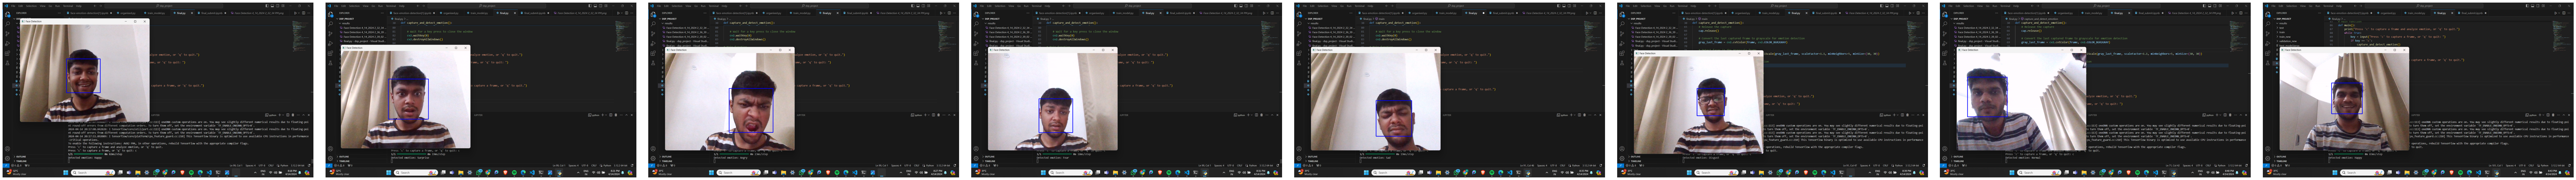

In [53]:
plot_results('results')

# THANK YOU
